<h1><center> CART MODEL



In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
status_data = pd.read_csv("mypersonality_cleaned.csv")
status_data = status_data.drop(['Unnamed: 25'], axis=1)
status_data = status_data.drop(['Unnamed: 26'], axis=1)
status_data

,Unnamed: 0,#AUTHID,STATUS,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,sEXT,sNEU,sAGR,...,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,0,b7b7764cfa1c523e4e93ab2a79a946c4,like sound thunder,0.000,0.556,0.444,0.3612,2.65,3,3.15,...,n,y,6/19/2009 15:21,180,14861.6,93.29,0.03,15661.0,0.49,0.1
1,1,b7b7764cfa1c523e4e93ab2a79a946c4,sleepy even funny thats sleep,0.000,0.420,0.580,0.4404,2.65,3,3.15,...,n,y,7/2/2009 8:41,180,14861.6,93.29,0.03,15661.0,0.49,0.1
2,2,b7b7764cfa1c523e4e93ab2a79a946c4,sore knot muscle base neck stop hurting hand y...,0.319,0.466,0.216,0.6597,2.65,3,3.15,...,n,y,6/15/2009 13:15,180,14861.6,93.29,0.03,15661.0,0.49,0.1
3,3,b7b7764cfa1c523e4e93ab2a79a946c4,like sound song,0.000,0.556,0.444,0.3612,2.65,3,3.15,...,n,y,6/22/2009 4:48,180,14861.6,93.29,0.03,15661.0,0.49,0.1
4,4,b7b7764cfa1c523e4e93ab2a79a946c4,home love,0.000,0.808,0.192,0.6369,2.65,3,3.15,...,n,y,7/20/2009 2:31,180,14861.6,93.29,0.03,15661.0,0.49,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10008,10008,NaN,thing give away,0.000,0.000,0.000,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10009,10009,NaN,wishing saturday,0.000,0.000,0.000,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10010,10010,NaN,studying hard,0.000,0.000,0.000,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10011,10011,NaN,head,0.000,0.000,0.000,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
p = []
r = []
a = []
f= []
b = []

def summarize_metrics(tp, tn, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    f1_score = (2 * recall * precision) / (recall + precision)
    balanced_accuracy = ((tp/(tp+fn)) + (tn/(tn+fp))) / 2

    p.append(precision)
    r.append(recall)
    a.append(accuracy)
    f.append(f1_score)
    b.append(balanced_accuracy)
    print("Balanced accuracy: ",balanced_accuracy)
    print("Precison:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)
    print("F1 score:", f1_score)

    return p,r,a,f

In [96]:
status_data = status_data.dropna()
status_data

,Unnamed: 0,#AUTHID,STATUS,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,sEXT,sNEU,sAGR,...,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,0,b7b7764cfa1c523e4e93ab2a79a946c4,like sound thunder,0.000,0.556,0.444,0.3612,2.65,3,3.15,...,n,y,6/19/2009 15:21,180,14861.6,93.29,0.03,15661.0,0.49,0.10
1,1,b7b7764cfa1c523e4e93ab2a79a946c4,sleepy even funny thats sleep,0.000,0.420,0.580,0.4404,2.65,3,3.15,...,n,y,7/2/2009 8:41,180,14861.6,93.29,0.03,15661.0,0.49,0.10
2,2,b7b7764cfa1c523e4e93ab2a79a946c4,sore knot muscle base neck stop hurting hand y...,0.319,0.466,0.216,0.6597,2.65,3,3.15,...,n,y,6/15/2009 13:15,180,14861.6,93.29,0.03,15661.0,0.49,0.10
3,3,b7b7764cfa1c523e4e93ab2a79a946c4,like sound song,0.000,0.556,0.444,0.3612,2.65,3,3.15,...,n,y,6/22/2009 4:48,180,14861.6,93.29,0.03,15661.0,0.49,0.10
4,4,b7b7764cfa1c523e4e93ab2a79a946c4,home love,0.000,0.808,0.192,0.6369,2.65,3,3.15,...,n,y,7/20/2009 2:31,180,14861.6,93.29,0.03,15661.0,0.49,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9912,9912,deb899e426c1a5c66c24eeb0d7df6257,found chinese year valentines day make two hol...,0.355,0.088,0.558,-0.7717,2.15,2.15,4.1,...,n,y,1/28/2010 11:48,36,185.71,31.21,0.40,377.0,0.32,0.63
9913,9913,ea28a927cb6663480ea33ca917c3c8ba,picture mine old,0.000,0.000,1.000,0.0000,4.05,3.35,3.8,...,y,y,2/2/2010 20:08,83,2935.76,88.40,0.08,3120.0,0.47,0.26
9914,9914,ea28a927cb6663480ea33ca917c3c8ba,filthy swine,0.000,0.000,1.000,0.0000,4.05,3.35,3.8,...,y,y,2/9/2010 20:04,83,2935.76,88.40,0.08,3120.0,0.47,0.26
9915,9915,5532642937eb3497a43e15dbb23a9d2d,propnames b rip,0.315,0.000,0.685,-0.5574,1.4,4.05,3.3,...,n,y,2/10/2010 2:01,154,11424.5,98.25,0.02,11510.0,0.49,0.05


In [97]:
status_data = status_data.drop(['STATUS', '#AUTHID', 'sEXT', 'sNEU', 'sAGR','sCON', 'sOPN', 'DATE'], axis=1)
status_data

,Unnamed: 0,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,cEXT,cNEU,cAGR,cCON,cOPN,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,0,0.000,0.556,0.444,0.3612,n,y,n,n,y,180,14861.6,93.29,0.03,15661.0,0.49,0.10
1,1,0.000,0.420,0.580,0.4404,n,y,n,n,y,180,14861.6,93.29,0.03,15661.0,0.49,0.10
2,2,0.319,0.466,0.216,0.6597,n,y,n,n,y,180,14861.6,93.29,0.03,15661.0,0.49,0.10
3,3,0.000,0.556,0.444,0.3612,n,y,n,n,y,180,14861.6,93.29,0.03,15661.0,0.49,0.10
4,4,0.000,0.808,0.192,0.6369,n,y,n,n,y,180,14861.6,93.29,0.03,15661.0,0.49,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9912,9912,0.355,0.088,0.558,-0.7717,n,n,y,n,y,36,185.71,31.21,0.40,377.0,0.32,0.63
9913,9913,0.000,0.000,1.000,0.0000,y,y,y,y,y,83,2935.76,88.40,0.08,3120.0,0.47,0.26
9914,9914,0.000,0.000,1.000,0.0000,y,y,y,y,y,83,2935.76,88.40,0.08,3120.0,0.47,0.26
9915,9915,0.315,0.000,0.685,-0.5574,n,y,n,n,y,154,11424.5,98.25,0.02,11510.0,0.49,0.05


In [98]:
status_data = status_data.drop(['BROKERAGE', 'BETWEENNESS', 'NBROKERAGE','NBETWEENNESS', 'DENSITY', 'TRANSITIVITY', 'NETWORKSIZE'], axis=1)
status_data

,Unnamed: 0,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,cEXT,cNEU,cAGR,cCON,cOPN
0,0,0.000,0.556,0.444,0.3612,n,y,n,n,y
1,1,0.000,0.420,0.580,0.4404,n,y,n,n,y
2,2,0.319,0.466,0.216,0.6597,n,y,n,n,y
3,3,0.000,0.556,0.444,0.3612,n,y,n,n,y
4,4,0.000,0.808,0.192,0.6369,n,y,n,n,y
...,...,...,...,...,...,...,...,...,...,...
9912,9912,0.355,0.088,0.558,-0.7717,n,n,y,n,y
9913,9913,0.000,0.000,1.000,0.0000,y,y,y,y,y
9914,9914,0.000,0.000,1.000,0.0000,y,y,y,y,y
9915,9915,0.315,0.000,0.685,-0.5574,n,y,n,n,y


In [99]:
new_columns = status_data.columns.values
new_columns[0] = "rowID"
status_data.columns = new_columns

In [100]:
status_data

,rowID,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,cEXT,cNEU,cAGR,cCON,cOPN
0,0,0.000,0.556,0.444,0.3612,n,y,n,n,y
1,1,0.000,0.420,0.580,0.4404,n,y,n,n,y
2,2,0.319,0.466,0.216,0.6597,n,y,n,n,y
3,3,0.000,0.556,0.444,0.3612,n,y,n,n,y
4,4,0.000,0.808,0.192,0.6369,n,y,n,n,y
...,...,...,...,...,...,...,...,...,...,...
9912,9912,0.355,0.088,0.558,-0.7717,n,n,y,n,y
9913,9913,0.000,0.000,1.000,0.0000,y,y,y,y,y
9914,9914,0.000,0.000,1.000,0.0000,y,y,y,y,y
9915,9915,0.315,0.000,0.685,-0.5574,n,y,n,n,y


In [101]:
cols = status_data.columns.tolist()
cols = cols[:5] + cols[5:10]
status_data = status_data[cols]
status_data

,rowID,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,cEXT,cNEU,cAGR,cCON,cOPN
0,0,0.000,0.556,0.444,0.3612,n,y,n,n,y
1,1,0.000,0.420,0.580,0.4404,n,y,n,n,y
2,2,0.319,0.466,0.216,0.6597,n,y,n,n,y
3,3,0.000,0.556,0.444,0.3612,n,y,n,n,y
4,4,0.000,0.808,0.192,0.6369,n,y,n,n,y
...,...,...,...,...,...,...,...,...,...,...
9912,9912,0.355,0.088,0.558,-0.7717,n,n,y,n,y
9913,9913,0.000,0.000,1.000,0.0000,y,y,y,y,y
9914,9914,0.000,0.000,1.000,0.0000,y,y,y,y,y
9915,9915,0.315,0.000,0.685,-0.5574,n,y,n,n,y


In [102]:
status_data.isnull().values.any()
status_data[status_data.isna().any(axis=1)]

,rowID,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,cEXT,cNEU,cAGR,cCON,cOPN


In [103]:
status_data

,rowID,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,cEXT,cNEU,cAGR,cCON,cOPN
0,0,0.000,0.556,0.444,0.3612,n,y,n,n,y
1,1,0.000,0.420,0.580,0.4404,n,y,n,n,y
2,2,0.319,0.466,0.216,0.6597,n,y,n,n,y
3,3,0.000,0.556,0.444,0.3612,n,y,n,n,y
4,4,0.000,0.808,0.192,0.6369,n,y,n,n,y
...,...,...,...,...,...,...,...,...,...,...
9912,9912,0.355,0.088,0.558,-0.7717,n,n,y,n,y
9913,9913,0.000,0.000,1.000,0.0000,y,y,y,y,y
9914,9914,0.000,0.000,1.000,0.0000,y,y,y,y,y
9915,9915,0.315,0.000,0.685,-0.5574,n,y,n,n,y


In [104]:
features = ['cEXT', 'cNEU', 'cOPN', 'cAGR', 'cCON']
for feature in features:
  status_data[feature] = status_data[feature].map({'y': 1, 'n': 0}).fillna(0).astype(int)

In [105]:
status_data


,rowID,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,cEXT,cNEU,cAGR,cCON,cOPN
0,0,0.000,0.556,0.444,0.3612,0,1,0,0,1
1,1,0.000,0.420,0.580,0.4404,0,1,0,0,1
2,2,0.319,0.466,0.216,0.6597,0,1,0,0,1
3,3,0.000,0.556,0.444,0.3612,0,1,0,0,1
4,4,0.000,0.808,0.192,0.6369,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
9912,9912,0.355,0.088,0.558,-0.7717,0,0,1,0,1
9913,9913,0.000,0.000,1.000,0.0000,1,1,1,1,1
9914,9914,0.000,0.000,1.000,0.0000,1,1,1,1,1
9915,9915,0.315,0.000,0.685,-0.5574,0,1,0,0,1


In [106]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(status_data, test_size=0.50,random_state=42)


In [107]:
train = train_data.values
test = test_data.values

In [108]:
from sklearn.tree import DecisionTreeClassifier
cart_model = DecisionTreeClassifier()
model = cart_model.fit(train[0:,1:5],train[0:,7])

In [109]:
output = model.predict(test[:, 1:5])
rowID = [TEST.rowID for TEST in test_data.itertuples()]
result_df = pd.DataFrame({"rowID": rowID,"cOPN": list(output)})

In [110]:
 # Build the confusion matrix to assess the model
tp_count = 0
tn_count = 0
fp_count = 0
fn_count = 0
for row in rowID:
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)
  if test_cEXT_val == 1:
    if result_cEXT_val == 1:
        tp_count += 1
    else:
        fn_count += 1
  else:
    if result_cEXT_val == 1:
        fp_count += 1
    else:
        tn_count += 1


<ipython-input-110-c0b7aab48b93>:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-110-c0b7aab48b93>:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


2571 410 807 1140


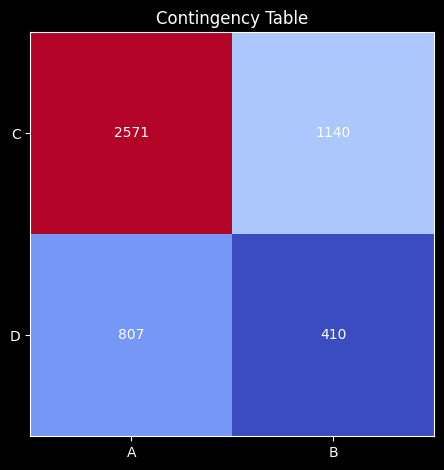

In [111]:
print(tp_count, tn_count, fp_count, fn_count)
data = np.array([[tp_count, fn_count ], [fp_count, tn_count ]])
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='coolwarm')
ax.set_xticks(np.arange(len(['A', 'B'])))
ax.set_yticks(np.arange(len(['C', 'D'])))
ax.set_xticklabels(['A', 'B'])
ax.set_yticklabels(['C', 'D'])
for i in range(len(['A', 'B'])):
    for j in range(len(['C', 'D'])):
        text = ax.text(j, i, data[i, j],
                       ha="center", va="center", color="w")
ax.set_title("Contingency Table")
fig.tight_layout()
plt.show()

In [112]:

#after adding random state
summarize_metrics(tp_count, tn_count, fp_count, fn_count)

Balanced accuracy:  0.5148495877254922
Precison: 0.761101243339254
Recall: 0.692805173807599
Accuracy: 0.6049107142857143
F1 score: 0.7253491324587389


([0.761101243339254],
 [0.692805173807599],
 [0.6049107142857143],
 [0.7253491324587389])

In [ ]:
#visualizing Social metrics at different test size and sample size

test_size = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]

for i in test_size :
    train_data, test_data = train_test_split(status_data, test_size=i,random_state=42)
    train = train_data.values
    test = test_data.values
    cmodel =cart_model.fit(train[0:,1:5],train[0:,7])
    model = cmodel.fit(train[0:,1:5],train[0:,7])
    output = model.predict(test[:, 1:5])
    rowID = [TEST.rowID for TEST in test_data.itertuples()]
    result_df = pd.DataFrame({"rowID": rowID,
                                  "cOPN": list(output)})
    tp_count = 0
    tn_count = 0
    fp_count = 0
    fn_count = 0
    for row in rowID:
      test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
      result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)
      if test_cEXT_val == 1:
        if result_cEXT_val == 1:
            tp_count += 1
        else:
            fn_count += 1
      else:
        if result_cEXT_val == 1:
            fp_count += 1
        else:
            tn_count += 1

    x = summarize_metrics(tp_count, tn_count, fp_count, fn_count)


<ipython-input-113-24d54b7f4063>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-113-24d54b7f4063>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5573203414415824
Precison: 0.7745664739884393
Recall: 0.7312414733969986
Accuracy: 0.6419878296146044
F1 score: 0.7522807017543859


<ipython-input-113-24d54b7f4063>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-113-24d54b7f4063>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5271883289124668
Precison: 0.76
Recall: 0.7068965517241379
Accuracy: 0.6152805949966194
F1 score: 0.7324870709920075


<ipython-input-113-24d54b7f4063>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-113-24d54b7f4063>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5222064481727741
Precison: 0.7571743929359823
Recall: 0.7004765146358066
Accuracy: 0.6095334685598377
F1 score: 0.7277227722772277


<ipython-input-113-24d54b7f4063>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-113-24d54b7f4063>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5074613481890289
Precison: 0.7488262910798122
Recall: 0.6953678474114442
Accuracy: 0.5994318181818182
F1 score: 0.7211076575303759


<ipython-input-113-24d54b7f4063>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-113-24d54b7f4063>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5138607738324853
Precison: 0.7589242053789731
Recall: 0.6984698469846985
Accuracy: 0.6066959756509976
F1 score: 0.7274431685024608


<ipython-input-113-24d54b7f4063>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-113-24d54b7f4063>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


In [ ]:
#value deleter
p.pop(0)
r.pop(0)
a.pop(0)
f.pop(0)
b.pop(0)

In [ ]:
print(b)
print(len(b))

In [ ]:
import matplotlib.pyplot as plt


plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("Accuracy")
plt.plot(test_size,a,'m--')

In [ ]:


plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("Balanced Accuracy")
plt.plot(test_size,b,'c--')

In [ ]:
plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("Recall")
plt.plot(test_size,r,'b--')

In [ ]:
plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("Precision")
plt.plot(test_size,p,'y--')

In [ ]:
plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("F1-Scores")
plt.plot(test_size,f,'w--')